In [30]:
import torch
import torch.nn as nn
import numpy as np
import GPy
import matplotlib.pyplot as plt
from BNN_Dropout import BNN_Dropout
from pybnn import bohamiann
from torch.utils.data import TensorDataset, DataLoader

import sys
sys.path.insert(0, './ref/DropoutUncertaintyExps/net/')
from net import net

In [31]:
dataset_name = 'concrete'
dataset_dir      = 'UCI_Datasets/' + dataset_name + "/data/"
data = torch.from_numpy(np.loadtxt(dataset_dir + "data.txt"))

feature_id = np.loadtxt(dataset_dir + "index_features.txt", dtype=int)
target_id   = np.loadtxt(dataset_dir + "index_target.txt", dtype = int)

xs = data[:,feature_id]
ys = data[:,target_id][:,None]

split_id = 19

train_id = np.loadtxt(dataset_dir + "index_train_{}".format(split_id) + ".txt", dtype = int)
test_id = np.loadtxt(dataset_dir + "index_test_{}".format(split_id) + ".txt", dtype = int)

train_x = xs[train_id]
train_y = ys[train_id]
test_x   = xs[test_id]
test_y   = ys[test_id]

dim = train_x.shape[1]

normalize = True
if normalize:
    x_mean = train_x.mean(dim = 0)
    x_std     = train_x.std(dim = 0)
    train_x   = (train_x - x_mean) / x_std
    test_x     = (test_x  - x_mean) / x_std

In [32]:
conf = dict()
conf['num_epochs'] = 2400
conf['batch_size'] = 32
conf['lr'] = 1e-3
conf['print_every'] = 50
conf['dropout_rate'] = 0.15
conf['tau'] = 0.025
model = BNN_Dropout(dim = dim, act = nn.ReLU(), conf=conf)
model.train(train_x, train_y)
rmse_train = torch.sqrt(torch.nn.MSELoss()(model.predict(train_x), train_y))
rmse_test = torch.sqrt(torch.nn.MSELoss()(model.predict(test_x), test_y))
print('RMSE is %g' % rmse_train)
print('RMSE is %g' % rmse_test)
model.validate(test_x, test_y, n_samples = 100)

After 50 epochs, loss is 0.311087
After 100 epochs, loss is 0.30405
After 150 epochs, loss is 0.258391
After 200 epochs, loss is 0.260984
After 250 epochs, loss is 0.237414
After 300 epochs, loss is 0.229646
After 350 epochs, loss is 0.208887
After 400 epochs, loss is 0.230595
After 450 epochs, loss is 0.217613
After 500 epochs, loss is 0.216062
After 550 epochs, loss is 0.20803
After 600 epochs, loss is 0.210568
After 650 epochs, loss is 0.21966
After 700 epochs, loss is 0.201627
After 750 epochs, loss is 0.165509
After 800 epochs, loss is 0.209393
After 850 epochs, loss is 0.173442
After 900 epochs, loss is 0.210724
After 950 epochs, loss is 0.193592
After 1000 epochs, loss is 0.201755
After 1050 epochs, loss is 0.187176
After 1100 epochs, loss is 0.184009
After 1150 epochs, loss is 0.201121
After 1200 epochs, loss is 0.224467
After 1250 epochs, loss is 0.225455
After 1300 epochs, loss is 0.225241
After 1350 epochs, loss is 0.201759
After 1400 epochs, loss is 0.185831
After 1450 epoc

TypeError: validate() got an unexpected keyword argument 'n_samples'

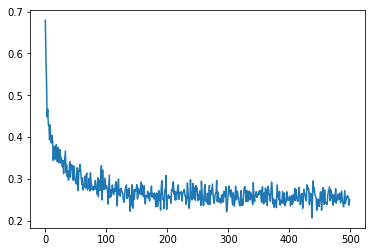

In [27]:
plt.plot(model.rec_losses)

In [19]:
model.validate(test_x, test_y)

(5.067245367664213, 3.411133408755254)

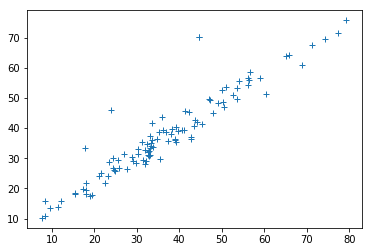

In [16]:
plt.plot(test_y.numpy(), m.detach().numpy(), '+')

In [17]:
py = model.predict(test_x)

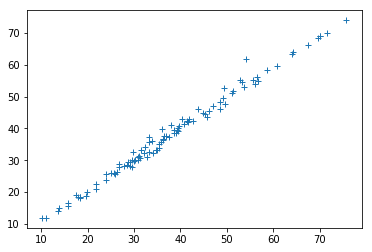

In [18]:
plt.plot(m.detach().numpy(), py.detach().numpy(), '+')